# Bryne's Euclid: Book I

```epigraph
*Elements* is a *tour de force*. Theorem, theorem, problem, theorem, all laid out in confident succession. It was not always known that from simple rules you could rigorously deduce beautiful facts. It was not always known that you could start with so little, and end with so much.

--TurnTrout
```

References:
- [Elementary Euclid](https://www.c82.net/euclid/book1/)

## Definitions

### Definition I: Points
A *point* is that which has no parts.

But in python, a point in $\mathbb R^2$ has two parts: $x$ and $y$ representing the coordinates:

In [1]:
import numpy as np
from Geometry.Shape import P2, point2, polar2, unp2, unpolar2, midpoint

In [2]:
p1=point2((1,0))
print(p1)

[[1]
 [0]]


In [3]:
p2=polar2(1,np.pi/4.0)
print(p2)

[[0.70710678]
 [0.70710678]]


In [4]:
unp2(p1+p2)

(1.7071067811865475, 0.7071067811865475)

In [5]:
unpolar2(p1-p2)

(0.7653668647301795, 2.748893571891069)

In [6]:
unp2(p1-p2)

(0.2928932188134524, -0.7071067811865475)

### Definition II: Line
A *line* is length without breadth.

### Definition III: Line and points
The extremities of a line are points.

### Definition IV: Straight line
A *straight* or right line is that which lies evenly between its extremities.

In [7]:
from Geometry.Shape import Shape, Line2
import numpy as np

In [8]:
l=Line2(point2((1,0)),point2((0,1)))

In [9]:
np.linalg.norm(l.e2-l.e1)

1.4142135623730951

Let's graduately build up the drawing library so we can visualize the geometrical objects and verify concepts. Considering the fact that we could use different drawing packages, we need to abtract the drawing logic and defining the necessary interfaces so that our library is extentable.

The packages currently under consideration are the matplotlib in python and tikz/pgf in latex.

The follloing are the abstract layer of the library:
- Shape: abstract geometrical primitive class
- Drawable: abstract drawable (recongnized by the drawing system) for the geometrical primitive objects
- Renderer: abstract rendering class
- Draw: Drawing interface for drawing Drawable objects into a renderer. It defines a drawing method `diagram` that takes a list of `Drawable` as input and return `Renderer`.

The matplotlib implementation of the above abstract layer is as follows. For the structure of the matplotlib, one can look at the matplotlib official documentation. Also, [Matplotlib](https://www.aosabook.org/en/matplotlib.html) provides very good inside on the matplotlib package.

Matplotlib impl of `Shape`

Matplotlib impl of `Rederer`

Matplotlib impl of the `Drawable` and `Draw` interface

In [10]:
from Graphic.Device import Display
from Geometry.MPLImple import DrawMPL

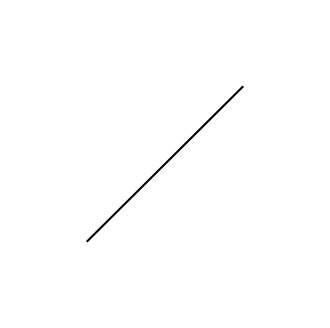

In [11]:
%matplotlib notebook
l=Line2(point2((0.25,0.25)),point2((0.75,0.75)))
with Display(DrawMPL(),[l]) as renderer:
    renderer.show()

In [12]:
for i in renderer.drawables(): print(i.content())

Line2D(_child0)


### Definition V: Surface
A *surface* is that which has length and breadth only.

### Definition VI: Surface and lines
The extremities of a surface are lines.

### Definition VII: Plane
A plane surface is that which lies evenly between its extremities.

### Definition VIII: Plane angle
A *plane angle* is the inclination of two lines to one another, in a plane, which meet together, but are not in the same direction.

### Definition IX: Plane rectilinear angle
A *plane rectilinear angle* is the inclination of two straight lines to one another, which meet together, but are not in the same straight line.

### Definition X: Right angle, perpendicular lines
When one straight line standing on another straight line makes the adjacent angles equal, each of these angles is called a *right angle*, and each of these lines is said to be *perpendicular* to the other.

### Definition XI: Obtuse angle
An *obtuse angle* is an angle greater than a right angle.

### Definition XII: Acute angle
An *acute angle* is leſs than a right angle.

### Definition XIII: Term and boundary
A *term* or *boundary* is the extremity of any thing.

### Definition XIV: Figure
A *figure* is a surface enclosed on all sides by a line or lines.

### Definition XV: Circle
A *circle* is a plane figure, bounded by one continued line, called its *circumference* or *periphery*; and having a certain point within it, from which all straight lines drawn to its circumference are equal.

### Definition XVI: The center of a circle
This point (from which the equal lines are drawn) is called the *centre* of the circle.

### Definition XVII: Diameter of a circle
A *diameter* of a circle is a straight line drawn through the centre, terminated both ways in the circumference.

### Definition XVIII: Semicircle
A *semicircle* is the figure contained by the diameter, and the part of the circle cut off by the diameter.

### Definition XIX: Segment of a circle
A segment of a circle is a figure contained by a straight line, and the part of the circumference which it cuts off.

In [13]:
from Geometry.Shape import Circle2

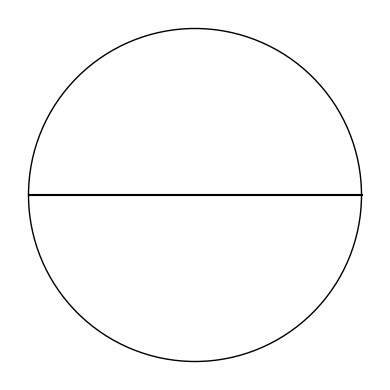

In [14]:
l=Line2(point2((0.05,0.5)),point2((0.95,0.5)))
c=Circle2(0.45,point2((0.5,0.5)))
with Display(DrawMPL(),[l,c]) as renderer:
    renderer.show()

In [15]:
for i in renderer.drawables(): print(i.content())

Line2D(_child0)
Circle(xy=(0.5, 0.5), radius=0.45)


In [16]:
print(DrawMPL.shape2drawable)

{}


### Definition XX: Rectilinear figure
A figure contained by straight lines only, is called a rectilinear figure.

### Definition XXI: Triangle
A triangle is a rectilinear figure included by three sides.

### Definition XXII: Quadrilateral figure
A *quadrilateral figure* is one which is bounded by four sides. The straight lines {tikz}`[blue,thick] \draw[->] (0,0) -- (1,0);` and {tikz}`[red,thick] \draw[->] (0,0) -- (1,0);` connecting the vertices of the oppoſite angles of a quadrilateral figure, are called its diagonal.

### Definition XXIII: Polygon
A *polygon* is a rectilinear figure bounded by more than four sides.

In programming, we extend the concept of *polygon* to include *triangle*:

In [17]:
from Geometry.Shape import Polygon2, vertices2lines

In [18]:
ps=list(map(lambda x: point2(x),[(0,0),(1,0),(0,1)]))
ls=vertices2lines(ps)
Polygon2.Triangle(ls)

Polygon2(boundary=[(matrix([[0],
        [0]]), matrix([[1],
        [0]])), (matrix([[1],
        [0]]), matrix([[0],
        [1]])), (matrix([[0],
        [1]]), matrix([[0],
        [0]]))])

In [19]:
ps=list(map(lambda x: point2(x),[(0,0),(1,0),(1,1),(0,1)]))
ls=vertices2lines(ps)
Polygon2.Rectangle(ls)

Polygon2(boundary=[(matrix([[0],
        [0]]), matrix([[1],
        [0]])), (matrix([[1],
        [0]]), matrix([[1],
        [1]])), (matrix([[1],
        [1]]), matrix([[0],
        [1]])), (matrix([[0],
        [1]]), matrix([[0],
        [0]]))])

In [20]:
ps=list(map(lambda x: point2(x),[(0,0),(1,0),(1.25,0.5),(0.5,1),(-0.25,0.5)]))
ls=vertices2lines(ps)
Polygon2.Pentagon(ls)

Polygon2(boundary=[(matrix([[0],
        [0]]), matrix([[1],
        [0]])), (matrix([[1],
        [0]]), matrix([[1.25],
        [0.5 ]])), (matrix([[1.25],
        [0.5 ]]), matrix([[0.5],
        [1. ]])), (matrix([[0.5],
        [1. ]]), matrix([[-0.25],
        [ 0.5 ]])), (matrix([[-0.25],
        [ 0.5 ]]), matrix([[0],
        [0]]))])

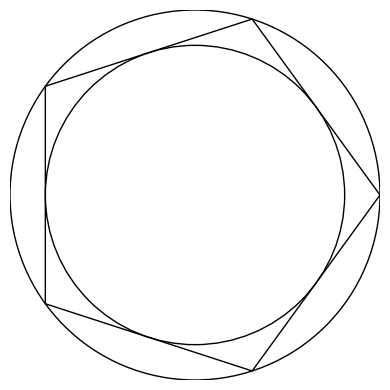

In [21]:
n=5
theta=np.pi/n
r=1
R=r/np.cos(theta)
ps=[polar2(R,2*j*theta) for j in range(n)]
#p=Polygon2(vertices2lines(ps))
p=Polygon2.PolygonRegular(point2((0,0)),1,n)
cir1=Circle2(r)
cir2=Circle2(R)
with Display(DrawMPL(),[p,cir1,cir2]) as r:
    r.graphicStore().set_xlim(-R,R)
    r.graphicStore().set_ylim(-R,R)
    r.show()

In [22]:
from Contexts.Foldable import foldl

In [23]:
ps=[point2((0,0)),polar2(1,np.pi/3),point2((1,0))]
center=foldl(lambda acc,x:acc+x,point2((0,0)),ps)/len(ps)
list(map(lambda x:np.linalg.norm(x-center),ps))

[0.5773502691896257, 0.5773502691896257, 0.5773502691896257]

In [24]:
np.linalg.norm(ps[1]-ps[2])

0.9999999999999999

### Pappus chain

Constructing the pappus chain geometrical objects:

In [25]:
nc=16
xB=6; xC=9
r=xB/xC
A=point2((0,0)); B=point2((xB,0)); C=point2((xC,0))
AB=B-A; AC=C-A
rs=[xC*r*(1-r)/(2*(r+n*n*(1-r)*(1-r))) for n in range(nc+1)]
ps=[point2((thisr*(1+r)/(1-r), n*thisr*2)) for n,thisr in zip(range(nc+1),rs)]
cirAC=Circle2(xC/2,point2((xC/2,0))); cirAB=Circle2(xB/2,point2((xB/2,0)))
theCir=Circle2((xC+xB)/4,point2(((xC+xB)/4,0)))
csp=list(map(lambda x: Circle2(x[0],x[1]),zip(rs,ps)))
R=np.mat([[1,0],[0,-1]]) # reflection accross x-axis (should be accross AB in general)
csn=list(map(lambda x: Circle2(x[0],R*x[1]),zip(rs,ps)))

Drawing the pappus chain in memory using matplotlib impl of the `Draw`:

In [26]:
from matplotlib import cm
from cycler import cycler
with Display(DrawMPL(size=(8,8)),[cirAC,cirAB,theCir]+csp+csn[1:]) as pappus_chain:
    pappus_chain.graphicStore().set_xlim(0,xC)
    pappus_chain.graphicStore().set_ylim(-xC/2,xC/2)

Rendering the drawing result with default styling:

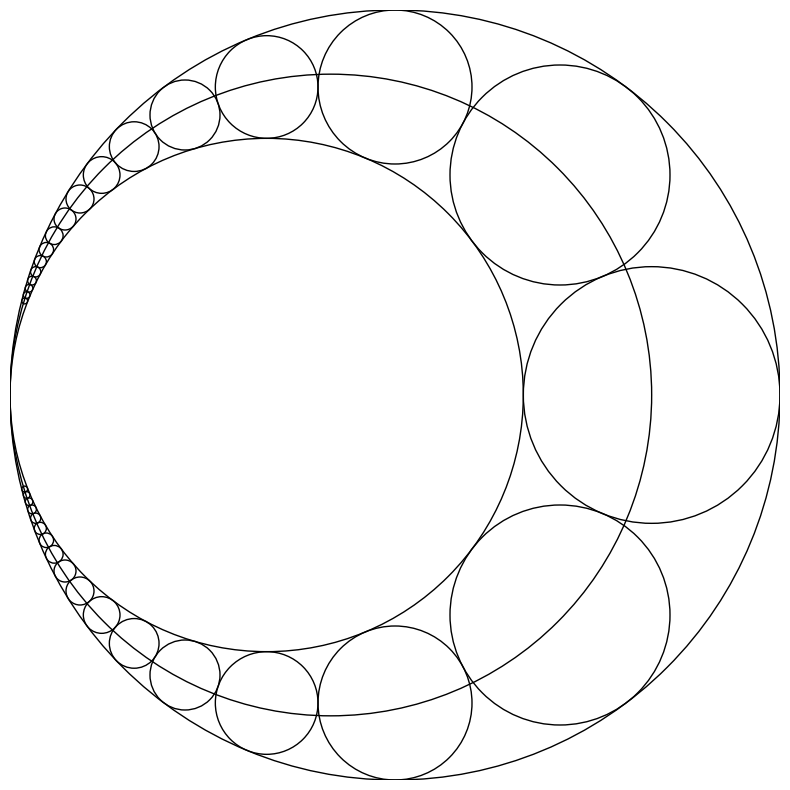

In [27]:
pappus_chain.show()

Custominzing the style:

In [39]:
def rgb2rgba(c:tuple[float,float,float],a:float)->tuple[float,float,float,float]:
    return c+(a,)
tearose_orange=(0.97,0.51,0.47)
cocoabrown=(0.82, 0.41, 0.12)
dartmouthgreen=(0.05, 0.5, 0.06)
densities=[0.2,0.4,0,0.8]
for i in pappus_chain.drawables(): # decorating the diagram
    tmp=i.content()
    tmp.set_fill(True)
    tmp.set_edgecolor('none')
    tmp.set_facecolor(rgb2rgba(dartmouthgreen,densities[3]))
tmp=pappus_chain.drawables()
tmp[0].content().set_facecolor(rgb2rgba(dartmouthgreen,densities[0])) # setting the big circle
tmp[1].content().set_facecolor(rgb2rgba(dartmouthgreen,densities[1])) # setting the small circle
tmp[2].content().set_fill(False) # setting the trajectory circle
tmp[2].content().set_edgecolor('yellow')
tmp[2].content().set_linewidth(0.5)
tmp[2].content().set_linestyle('-.')

Rendering the styled drawing:

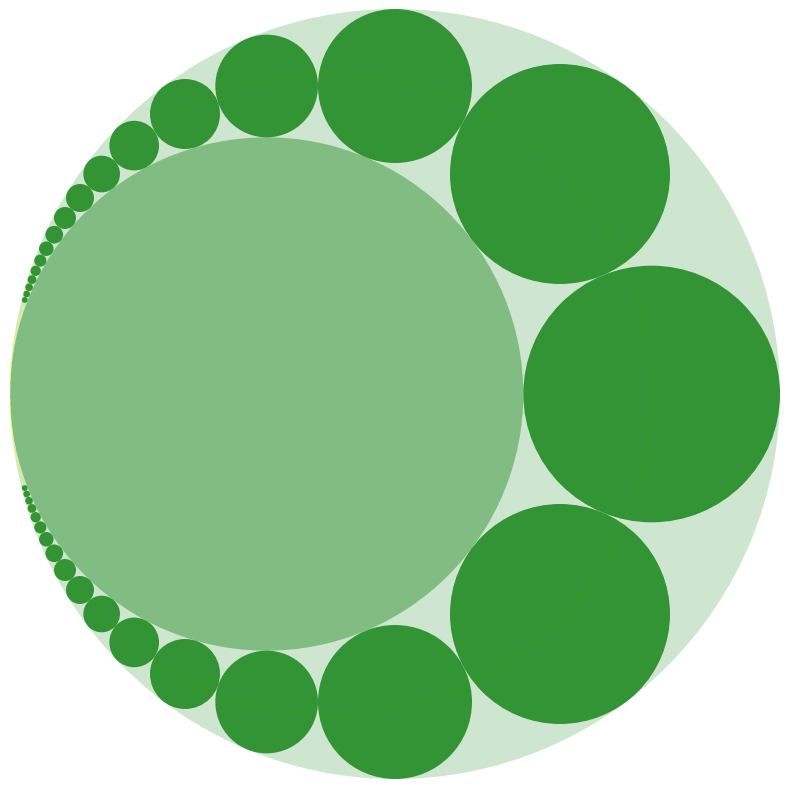

In [40]:
pappus_chain.show()

What we have done here is to decouple the geometrical shapes, drawing, rendering and styling. This follows the principle of seperating data layer from presentation layer. Data layer for this case (the geometrical case) is the geometrical shapes. Given a set of data, it could result in many possible presentations. The choice is up to the application or the user. The possible presentations arise from different application environments and the user views of presenting data.

The application environment includes the used (from the application) drawing tools (matplotlib, imagedraw, plotly, tikz, to name the few), the rendering media (ipython, qt5, ..., etc.).  

The user's view on presenting data consists of the choice of application environment and the styling of the data.

### Coxeter's Loxodromic Sequence of Tangent Circles

## Linear transformations
### Rotation
Rotation matrix: rotates every point in $\mathbb R^2$ clockwise by $\theta$ angle.

In [30]:
def rotationMatrix(theta:float):
    return np.mat([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])

In [31]:
A=rotationMatrix(np.pi/2)

A rotation matrix $A$ must be an orthonormal matrix, i.e. $AA^T=I$.

In [32]:
A*np.matrix.transpose(A)

matrix([[1., 0.],
        [0., 1.]])

In [33]:
p1

matrix([[1],
        [0]])

In [34]:
A*p1

matrix([[ 6.123234e-17],
        [-1.000000e+00]])

In [35]:
from Geometry.Shape import lines2matrix
lines2matrix(ls)

matrix([[ 0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  1.25,  1.25,  0.5 ,  0.5 ,
         -0.25, -0.25,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.5 ,  0.5 ,  1.  ,  1.  ,
          0.5 ,  0.5 ,  0.  ]])

In [36]:
A*lines2matrix(ls)

matrix([[ 0.000000e+00,  6.123234e-17,  0.000000e+00,  6.123234e-17,
          6.123234e-17,  5.000000e-01,  5.000000e-01,  1.000000e+00,
          1.000000e+00,  5.000000e-01,  5.000000e-01,  0.000000e+00],
        [ 0.000000e+00, -1.000000e+00,  0.000000e+00, -1.000000e+00,
         -1.000000e+00, -1.250000e+00, -1.250000e+00, -5.000000e-01,
         -5.000000e-01,  2.500000e-01,  2.500000e-01,  0.000000e+00]])

### Linear operators and orthogonal transformations
We can astract the rotation operator as follows:
- Liniear operator: A linear operator $L$ in $\mathbb R^2$ is a mapping $L:\mathbb R^2\rightarrow\mathbb R^2$ and satisfies

$$L(\alpha_1 v_1+\alpha_2 v_2)=\alpha_1L(v_1)+\alpha_2L(v_2),\quad\forall\alpha_1,\alpha_2\in\mathbb R\ \textrm{and}\ \forall v_1,v_2\in\mathbb R^2$$

- Let $\mathfrak L_2(\mathbb R)$ be the set of all linear operators and $\mathfrak M_2(\mathbb R)$ be the set of all $2\times 2$ matrices. Then $\mathfrak L_2(\mathbb R)\simeq\mathfrak M_2(\mathbb R)$, where $\simeq$ means *isomorphic* to, i.e. we can find a *one-to-one* mapping between $\mathfrak L_2(\mathbb R)$ and $\mathfrak M_2(\mathbb R)$. In particular, for each linear operator, we can find its unique matrix represention in $\mathfrak M_2(\mathbb R)$ under a given isomorphism. 
- Orthongonal transformation: when the matrix representation of a linear operator is in $O_2(\mathbb R)$, we call $L$ a orthogonal transformation, where $O_2(\mathbb R)$ is the set of orthogonal matrices. A matrix $A$ is orthogonal, if $AA^T\in D_2(\mathbb R)$, here $D_2(\mathbb R)$ is the set of $2\times 2$ diagonal matrices.
- The column vectors for a $2\times 2$ orthogonal matrix forms a basis in $R^2$. So the orthogonal transform is equivalence to changing basis.

### Translation


### Scaling

### Affine transform

### Congruence

### Similarity
As a map $f: \mathbb R^n\rightarrow\mathbb R^n$, a *similarity* of ratio $r$ takes the form $f(x):=rAx+t$, where $A\in O_n(\mathbb R)$ is an $n\times n$ orthogonal matrix and $t\in\mathbb R^n$ is a translation vector.

The only difference compared to *congruence* is that congruence requires $r=1$.

## General linear group $GL_2(\mathbb R)$
The general linear group of degree $n$ is the set of $n\times n$ *invertible* matrices, together with the operation of ordinary matrix multiplication. This forms a *group*, because the product of two invertible matrices is again invertible, and the inverse of an invertible matrix is invertible, with *identity matrix* as the *identity element* of the group. The group is so named because the columns (and also the rows) of an invertible matrix are linearly independent, hence the vectors/points they define are in general linear position, and matrices in the general linear group take points in general linear position to points in general linear position.

More generally, the general linear group of a vector space $GL(V)$ is the [automorphism group](https://en.wikipedia.org/wiki/Automorphism_group), not necessarily written as matrices.